# Happy Customer Survay

## 1. Explorative Data Analysis

### 1.1. Data Import

In [1]:
import pandas as pd

feedbacks = pd.read_csv('ACME-HappinessSurvey2020.csv')

### 1.2. Data Description

In [2]:
feedbacks.head(5)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


The dataset consists of 7 variables. X1-X6 represent responses to the survey's question. Whereas Y indicates the happiness of the customer.  
Y – Target variable where 0 indicate a customer is unhappy and 1 indicate that customer is happy  
X1 – Order delivered on time  
X2 – Contents of the order are as expected  
X3 – Ordered everything required  
X4 – Pay a good price for the order  
X5 – Satisfy with a courier  
X6 – Ordering through the app is easy  
Value of X1-X6 ranging between 1 and 5. A high value means customers agree and low means disagree. 

### 1.3. Statistical Summary

In [3]:
feedbacks.astype('category').describe()

,Y,X1,X2,X3,X4,X5,X6
count,126,126,126,126,126,126,126
unique,2,4,5,5,5,5,5
top,1,5,3,3,4,4,5
freq,69,65,42,55,53,50,57


The above table shows the statistical summary of the feedback dataset. This shows total observations, number of unique values, top value and frequency.

### 1.4. Data Distribution

Assumption 1 : 3 is a neutral rating. Higher than 3 customer agrees to statement. In contrast, less than 3 customer disagrees with the statement.

<AxesSubplot:xlabel='X1', ylabel='count'>

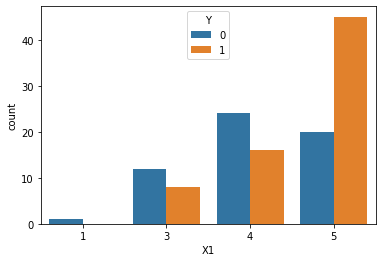

In [4]:
import seaborn as sns

sns.countplot(x="X1",hue="Y",data=feedbacks)

This graph shows customer has given higher ratings for the question on timely deliver.  
The above bar graph shows that customer who agrees that the order was delivered on time are happier. Happy customers who rate this question 5 is double those who are not happy and rate question 5.


<AxesSubplot:xlabel='X2', ylabel='count'>

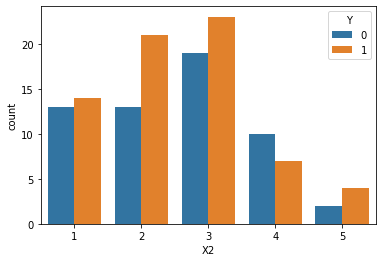

In [5]:
sns.countplot(x="X2",hue="Y",data=feedbacks)

The above graph shows that customers mostly disagree that the content of the order is as expected because the bar chart is skewed to the left.  
No significant trend can be seen between happy and unhappy customers for the rating of this question.


<AxesSubplot:xlabel='X3', ylabel='count'>

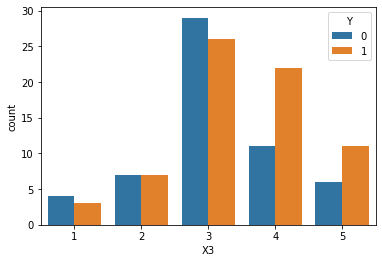

In [6]:
sns.countplot(x="X3",hue="Y",data=feedbacks)

The above bar graph is skewed on the right hence the number of customers who agrees to question X3 is more than those who disagree.  
There is a high chance of customers being happy if they agree that they ordered everything which they want to order.


<AxesSubplot:xlabel='X4', ylabel='count'>

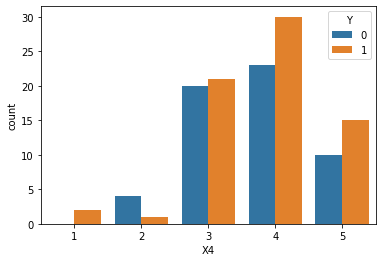

In [7]:
sns.countplot(x="X4",hue="Y",data=feedbacks)

The above bar graph is skewed on the right hence the number of customers who agrees to question X4 is more than those who disagree.  
There is a high chance of customers being happy if they agree that they paid a good price for the order.


<AxesSubplot:xlabel='X5', ylabel='count'>

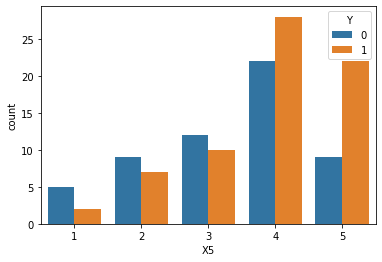

In [8]:
sns.countplot(x="X5",hue="Y",data=feedbacks)

The above bar graph is skewed on the right hence the number of customers who agrees to question X5 is more than those who disagree.  
There is a high chance of customers being happy if they agree that they are satisfied with the courier.


<AxesSubplot:xlabel='X6', ylabel='count'>

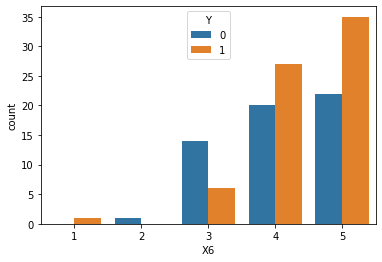

In [9]:
sns.countplot(x="X6",hue="Y",data=feedbacks)

The above bar graph is skewed on the right hence the number of customers who agrees to question X6 is more than those who disagree.  
There is a high chance of customers being happy if they agree that ordering through the app is easy.


### 1.5. Correlation Analysis

<AxesSubplot:>

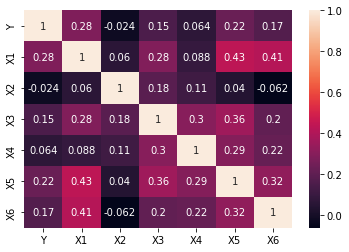

In [10]:
corr = feedbacks.corr()
sns.heatmap(corr,annot=True)

The correlation graph shows that X2 and X4 are very less correlated with target variable Y. Hence, just content of order or price of the order being good individually have less impact on the customer is happy. Another variable has a nice correlation value with Y.

## 2. Predictive Model

### 2.1. Data Partition

In [11]:
from sklearn.model_selection import train_test_split
X = feedbacks.iloc[:,1:6]
y = feedbacks.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=38)

### 2.2. K Nearest Neighbor

#### 2.2.1. Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

#### 2.2.2. Fit Analysis

In [13]:
from sklearn.metrics import confusion_matrix
y_train_pred = knn.predict(X_train)
confusion_matrix(y_train_pred,y_train)

array([[42, 21],
       [ 2, 35]], dtype=int64)

In [14]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_train, y_train_pred, average='micro')


(0.77, 0.77, 0.7699999999999999, None)

For train data,  
Precision = 0.77,  
Recall = 0.77,  
F1 = 0.77

In [15]:
y_test_pred = knn.predict(X_test)
confusion_matrix(y_test_pred,y_test)

array([[11,  4],
       [ 2,  9]], dtype=int64)

In [16]:
precision_recall_fscore_support(y_test, y_test_pred, average='micro')

(0.7692307692307693, 0.7692307692307693, 0.7692307692307693, None)

For test data,  
Precision = 0.77,  
Recall = 0.77,  
F1 = 0.77

#### 2.2.3. Model Interpretation

In [17]:
import shap
explainerKNN = shap.KernelExplainer(knn.predict, X_train)
shap_values_KNN_test = explainerKNN.shap_values(X_test)

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


  0%|          | 0/26 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with fe

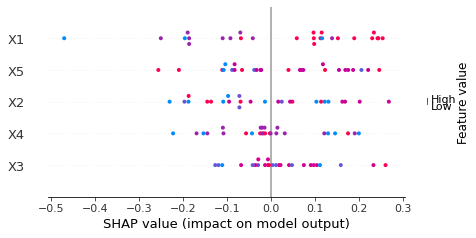

In [18]:
shap.summary_plot(shap_values_KNN_test,X_test)

The above diagram helps to understand the working of the model.  
With the increase in ratting for timely delivery of order i.e., X1 increases predictability of customer being happy.  
An increase in customer satisfaction on courier increases the chance of customer predicted as satisfied.


### 2.3. Xgboost

#### 2.3.1. Model

In [19]:
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective='reg:logistic',
                         n_estimators=9, seed=32)
xg_cl.fit(X_train,y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=9, n_jobs=12,
              num_parallel_tree=1, objective='reg:logistic', predictor='auto',
              random_state=32, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=32, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### 2.3.2. Fit Analysis

In [20]:
y_train_pred = xg_cl.predict(X_train)
confusion_matrix(y_train_pred,y_train)

array([[30,  6],
       [14, 50]], dtype=int64)

In [21]:
precision_recall_fscore_support(y_train, y_train_pred, average='micro')

(0.8, 0.8, 0.8000000000000002, None)

For test data,  
Precision = 0.8,  
Recall = 0.8,  
F1 = 0.8

In [22]:
y_test_pred = xg_cl.predict(X_test)
confusion_matrix(y_test_pred,y_test)

array([[ 5,  1],
       [ 8, 12]], dtype=int64)

In [23]:
precision_recall_fscore_support(y_test, y_test_pred, average='micro')

(0.6538461538461539, 0.6538461538461539, 0.6538461538461539, None)

For test data,  
Precision = 0.65,  
Recall = 0.65,  
F1 = 0.65

#### 2.2.3. Model Interpretation

In [24]:
import shap
explainerXG = shap.KernelExplainer(xg_cl.predict, X_train)
shap_values_XG_test = explainerXG.shap_values(X_test)

  0%|          | 0/26 [00:00<?, ?it/s]

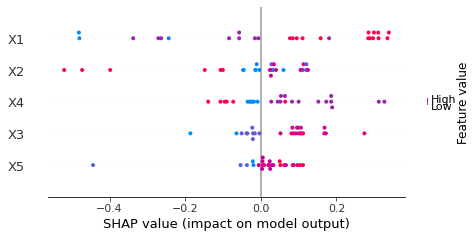

In [25]:
shap.summary_plot(shap_values_XG_test,X_test)

The above diagram helps to understand the working of the XGboost model.  
Increase in customer satisfaction for timely delivery increases predictability of customer being happy.  
This model penalises predictability of customer being happy with increasing value of ratting of content of order is as expected and paid good price for order.


## 3. Conclusion

More customers disagree that the content of the order was as expected. Whereas most of them agree with other statements.  
Earlier exploration suggests that customer being happy is very less correlated with the content of order was as expected and paid a good price for an order.  
KNN model performs better than the XGBoost model. KNN has 0.77 precision, recall and f1 score for both train and test datasets. KNN is also a simple model compared to XGBoost. For the proposed KNN model which has the number of neighbours, the value is 2 has the most important variable X1. An increase in stratification for timely delivery increase predictably for the customer to be happy.
